In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings("ignore")

In [2]:
age = np.array([12, 34, 23, 56, 38, 45, 18, 26])
insurance = np.array([0, 1, 0, 1, 1, 1, 0, 0])

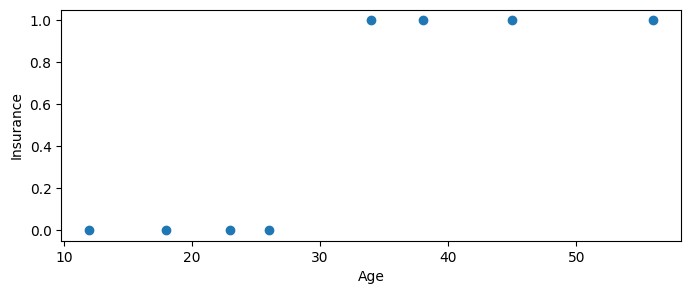

In [3]:
plt.figure(figsize=(8, 3))
plt.scatter(age, insurance, marker="o")
plt.xlabel("Age")
plt.ylabel("Insurance")
plt.show()

In [4]:
lr = 0.5
m = 3
c = 2
epochs = 2000
cost_ls = []

In [5]:
for i in range(epochs):
    pred = 1 / (1+np.exp(-(m*age+c)))

    cost = -np.mean(insurance*np.log(pred)+(1-insurance)*np.log(1-pred))
    cost_ls.append(cost)
    
    m_slope = -np.mean(age*(insurance-pred))
    c_slope = -np.mean(insurance-pred)

    m = m - (lr * m_slope)
    c = c - (lr * c_slope)

In [6]:
m, c

(1.0638591421915544, -31.790267113644013)

In [7]:
predictions = 1 / (1+np.exp(-(m*age+c)))

In [8]:
np.round(predictions)

array([0., 1., 0., 1., 1., 1., 0., 0.])

In [9]:
cost_ls

[nan,
 41.02343750005749,
 nan,
 nan,
 20.875003458074666,
 nan,
 nan,
 1.1991640128505083,
 nan,
 nan,
 75.91184804971495,
 nan,
 nan,
 55.76341054971069,
 nan,
 nan,
 35.614973050124064,
 nan,
 nan,
 15.46656064361131,
 nan,
 nan,
 2.103064645672177,
 99.99801318456113,
 nan,
 nan,
 79.84956901479683,
 nan,
 nan,
 59.701131514685514,
 nan,
 nan,
 39.55269401470133,
 nan,
 nan,
 19.40425746655917,
 nan,
 nan,
 0.41704140489634123,
 6.385842898828834,
 nan,
 nan,
 5.654657595946608,
 93.2997797542206,
 nan,
 nan,
 73.15134165431272,
 nan,
 nan,
 53.0029041543027,
 nan,
 nan,
 32.85446665447837,
 nan,
 nan,
 12.706040199074343,
 nan,
 nan,
 2.477095689981179,
 96.3079946643297,
 nan,
 nan,
 76.15954782793813,
 nan,
 nan,
 56.01111032778221,
 nan,
 nan,
 35.86267282779351,
 nan,
 nan,
 15.714236021013775,
 nan,
 nan,
 0.9134885101460624,
 78.5992791145992,
 nan,
 nan,
 58.45084161318749,
 nan,
 nan,
 38.302404113188715,
 nan,
 nan,
 18.153966688950984,
 nan,
 nan,
 0.18092375126907667,
 

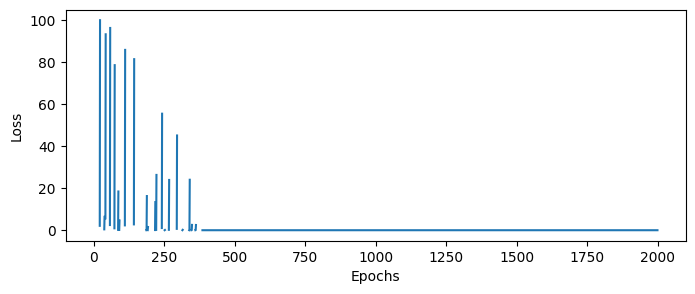

In [10]:
plt.figure(figsize=(8, 3))
plt.plot(range(epochs), cost_ls)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [11]:
predictions

array([5.47016305e-09, 9.87641110e-01, 6.60728337e-04, 1.00000000e+00,
       9.99822503e-01, 9.99999896e-01, 3.23718708e-06, 1.58294135e-02])

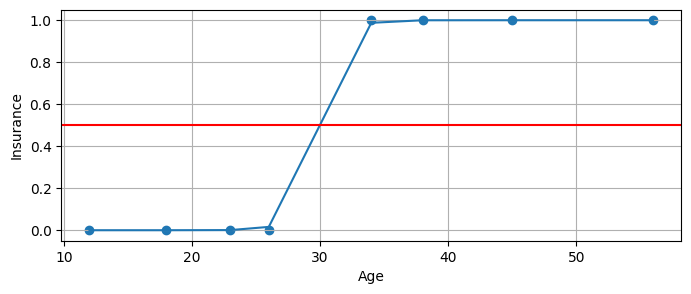

In [12]:
plt.figure(figsize=(8, 3))
plt.scatter(age, insurance, marker="o")
plt.plot(sorted(age), sorted(predictions))
plt.xlabel("Age")
plt.axhline(0.5, color="red")
plt.ylabel("Insurance")
plt.grid()
plt.show()

In [13]:
1 / (1+np.exp(-(m*31+c)))

0.7666277073095399

In [14]:
model = LogisticRegression()

In [15]:
model.fit(age.reshape(-1, 1), insurance)

LogisticRegression()

In [16]:
model.coef_

array([[0.6564214]])

In [17]:
model.intercept_

array([-19.72888779])

In [18]:
age.reshape(-1, 1)

array([[12],
       [34],
       [23],
       [56],
       [38],
       [45],
       [18],
       [26]])

In [19]:
sklearn_pred = 1 / (1+np.exp(-(model.coef_*age+model.intercept_)))

In [20]:
np.round(sklearn_pred)

array([[0., 1., 0., 1., 1., 1., 0., 0.]])

In [21]:
X, y = make_blobs(n_samples=200, n_features=1, centers = [[1, 1], [3, 5]])

In [22]:
X = X[:,1]

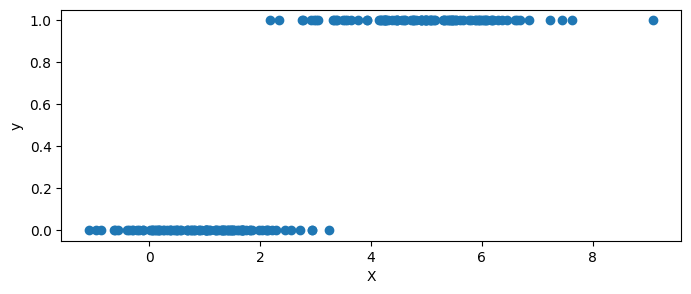

In [23]:
plt.figure(figsize=(8, 3))
plt.scatter(X, y, marker="o")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [24]:
lr = 0.5
m = 3
c = 2
epochs = 2000

for i in range(epochs):
    pred = 1 / (1+np.exp(-(m*X+c)))
    
    m_slope = -np.mean(X*(y-pred))
    c_slope = -np.mean(y-pred)

    m = m - (lr * m_slope)
    c = c - (lr * c_slope)

In [25]:
m, c

(3.3270651533703584, -9.060562731170688)

In [26]:
predictions = 1/(1+np.exp(-(m*X+c)))

In [27]:
predictions

array([1.15050099e-03, 4.41781598e-04, 9.99960671e-01, 9.99930108e-01,
       9.99984130e-01, 9.97823538e-01, 9.99984356e-01, 9.02706856e-01,
       1.58705396e-02, 8.81800372e-01, 3.66244355e-02, 8.46955294e-01,
       1.75301193e-02, 9.98827508e-01, 3.64888313e-03, 4.97448671e-01,
       6.61632155e-01, 6.06211612e-04, 2.85457799e-04, 9.92474088e-01,
       1.11749492e-01, 9.99912143e-01, 9.93601893e-01, 4.46921455e-05,
       9.91863108e-01, 2.80198900e-02, 2.17584942e-01, 9.92602947e-01,
       9.99994472e-01, 3.18298719e-05, 3.66821368e-01, 6.18407378e-05,
       1.12125101e-03, 4.48338235e-03, 9.98871498e-01, 9.99628525e-01,
       1.42724972e-03, 1.30112948e-02, 3.15952141e-02, 9.99890110e-01,
       9.69231690e-01, 2.47822675e-02, 9.99989958e-01, 9.99997424e-01,
       9.99465801e-01, 5.33848486e-01, 4.12781989e-04, 9.98085872e-01,
       4.18722843e-05, 3.46937542e-05, 4.13624172e-04, 5.41365333e-01,
       6.23298889e-04, 9.99890168e-01, 1.82295307e-05, 6.01595295e-04,
      

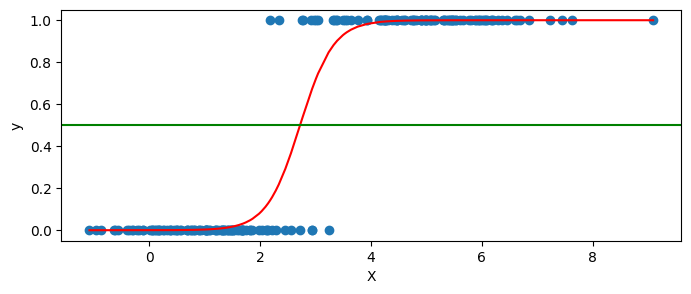

In [28]:
plt.figure(figsize=(8, 3))
plt.scatter(X, y, marker="o")
plt.plot(sorted(X), sorted(predictions), color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.axhline(0.5, color="green")
plt.show()